In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")


eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")

ineq_user_dau = user_dau[~user_dau.index.isin(eq_user_dau['user_id'])]

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [3]:
ronda_dau.head()

,id,num_ronda,bucket_inici_ronda,bucket_final_ronda,temps_inici_ronda,temps_final_ronda,partida_id,calculada
0,1,1,120,102,2015-12-12 11:15:35.868141,2015-12-12 11:15:47.496505,1,1
1,2,2,102,82,2015-12-12 11:16:02.496505,2015-12-12 11:16:13.482420,1,1
2,3,3,82,61,2015-12-12 11:16:28.482420,2015-12-12 11:16:40.223503,1,1
3,4,4,61,49,2015-12-12 11:16:55.223503,2015-12-12 11:17:07.851955,1,1
4,5,5,49,36,2015-12-12 11:17:22.851955,2015-12-12 11:17:33.835103,1,1


In [4]:
userronda_dau.head()

,id,ha_seleccionat,seleccio,temps_seleccio,ronda_id,user_id
0,1,1,4,2015-12-12 11:15:47.488159,1,1
1,2,1,3,2015-12-12 11:15:40.016475,1,2
2,3,1,4,2015-12-12 11:15:41.971357,1,3
3,4,1,2,2015-12-12 11:15:40.065619,1,6
4,5,1,2,2015-12-12 11:15:39.146240,1,7


In [5]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [6]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]*10

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]*10

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [7]:
#contr_vil

In [8]:
#Normalized mean contribution per user:
mean_contr_user_dau = contr_dau_norm.mean(axis=1)
mean_contr_user_street = contr_street_norm.mean(axis=1)
mean_contr_user_vil = contr_vil_norm.mean(axis=1)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

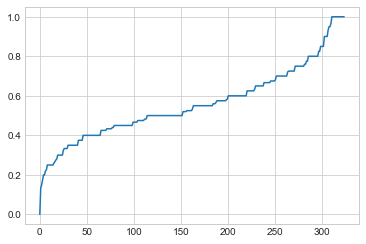

In [10]:
# Mean contribution per user: DAU
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(mean_contr_user_dau))

In [11]:
mean_contr_user_dau.describe()

count    324.000000
mean       0.557860
std        0.184889
min        0.000000
25%        0.450000
50%        0.529167
75%        0.666667
max        1.000000
dtype: float64

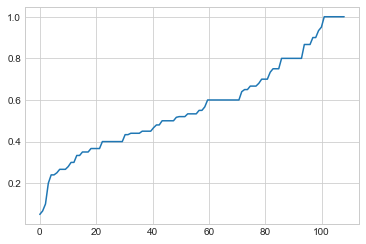

In [12]:
# Mean contribution per user: STREET
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_street['user_id'])), len(np.unique(userronda_street['user_id'])))
ax.plot(x, np.sort(mean_contr_user_street))

In [13]:
mean_contr_user_street.describe()

count    108.000000
mean       0.565062
std        0.226579
min        0.050000
25%        0.400000
50%        0.533333
75%        0.708333
max        1.000000
dtype: float64

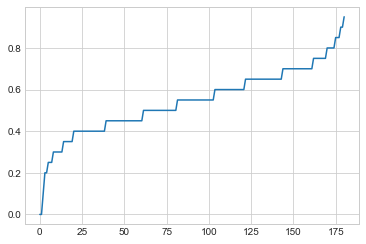

In [14]:
# Mean contribution per user: VIL
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_vil['user_id'])), len(np.unique(userronda_vil['user_id'])))
ax.plot(x, np.sort(mean_contr_user_vil))

In [15]:
mean_contr_user_vil.describe()

count    180.000000
mean       0.543056
std        0.160374
min        0.000000
25%        0.450000
50%        0.550000
75%        0.650000
max        0.950000
dtype: float64

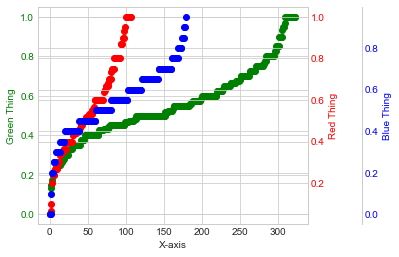

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)


# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
data = (np.sort(mean_contr_user_dau),np.sort(mean_contr_user_street),np.sort(mean_contr_user_vil))
for ax, color,data in zip(axes, colors,data):
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')

plt.show()

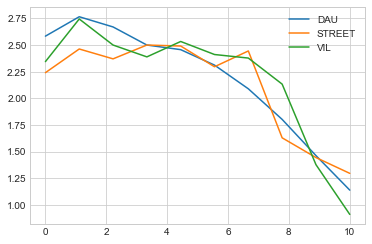

In [17]:
# Mean contribution per round
mean_contr_dau = contr_dau.mean(axis=0)
mean_contr_street= contr_street.mean(axis=0)
mean_contr_vil = contr_vil.mean(axis=0)
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_dau,label="DAU")
ax.plot(x, mean_contr_street,label="STREET")
ax.plot(x, mean_contr_vil,label="VIL")
plt.legend()

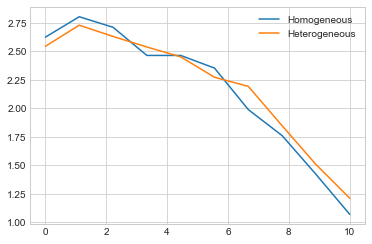

In [18]:
# Mean contribution per round
mean_contr_eq = eq_contr_dau.mean(axis=0)
mean_contr_ineq= ineq_contr_dau.mean(axis=0)

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_eq,label="Homogeneous")
ax.plot(x, mean_contr_ineq,label="Heterogeneous")

plt.legend()

In [19]:
contr_street['diners_inicials']=user_street['diners_inicials']
contr_street['mean_contr']=mean_contr_street

In [20]:
d = {'user_id':user_street['user_id'], 'din_ini':user_street['diners_inicials'],'Mean_contr':mean_contr_user_street}
df = pd.DataFrame(d)

In [21]:
#df

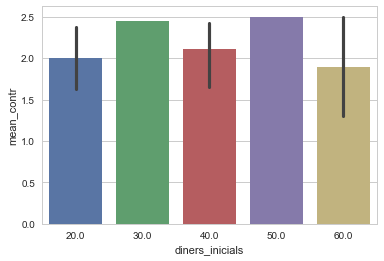

In [22]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset(contr_street)
ax = sns.barplot(x="diners_inicials", y="mean_contr", data=contr_street)

In [23]:
ineq_contr_dau['diners_inicials']=ineq_user_dau['diners_inicials']
ineq_contr_dau['mean_contr']=mean_contr_ineq

In [24]:
mean_contr_ineq

seleccio.1     2.543210
seleccio.2     2.728395
seleccio.3     2.629630
seleccio.4     2.537037
seleccio.5     2.450617
seleccio.6     2.271605
seleccio.7     2.191358
seleccio.8     1.845679
seleccio.9     1.506173
seleccio.10    1.209877
dtype: float64

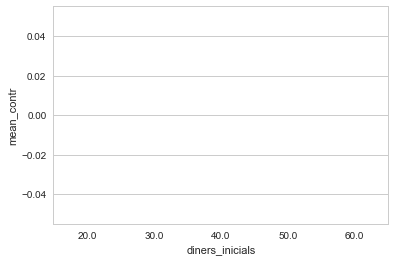

In [25]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset(contr_street)
ax = sns.barplot(x="diners_inicials", y="mean_contr", data=ineq_contr_dau)

### Strategies:

In [26]:
### Free Riding
#contr_dau.count(axis=1)
free_rid_dau = (contr_dau == 0).astype(int).sum(axis=1)

In [27]:
#np.sort(free_rid_dau)
#.sort_values(‘column_z’, ascending=False)

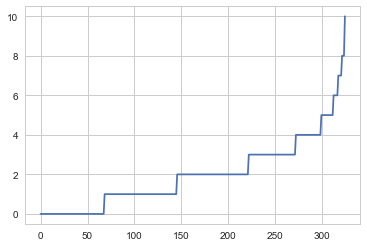

In [28]:
# Free Riding
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(free_rid_dau))

In [29]:
def free_riding(contr_ds,user_ds):
    free_rid = (contr_ds == 0).astype(int).sum(axis=1)
    # Free Riding
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, len(np.unique(user_ds['user_id'])), len(np.unique(user_ds['user_id'])))
    ax.plot(x, np.sort(free_rid))
    return(free_rid)

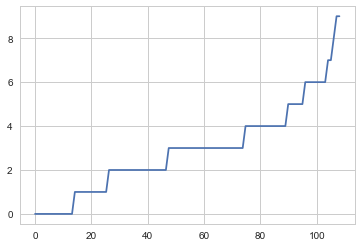

In [30]:
free_rid_street = free_riding(contr_street_norm,user_street)

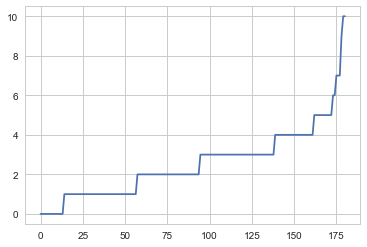

In [31]:
free_rid_vil = free_riding(contr_vil_norm,user_vil)

In [40]:
#free_rid_ineq = free_riding(ineq_contr_dau_norm,ineq_user_dau)

### Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

#### DAU: 

In [23]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

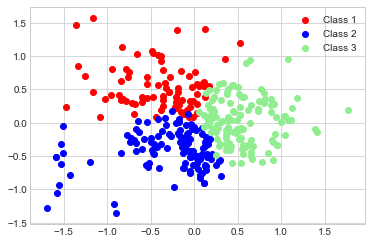

In [24]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [25]:
pca.explained_variance_ratio_

array([ 0.26208817,  0.17977144])

#### Heterogeneous DAU:

In [26]:
#ineq_dau_norm = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
#ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau_norm['user_id'])]

In [27]:
X = ineq_contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

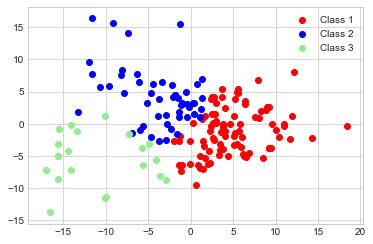

In [28]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [29]:
X = ineq_contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

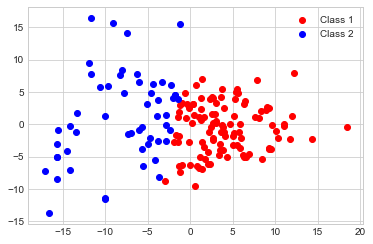

In [30]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogeneous DAU:

In [31]:
#eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
#eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [32]:
X = eq_contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

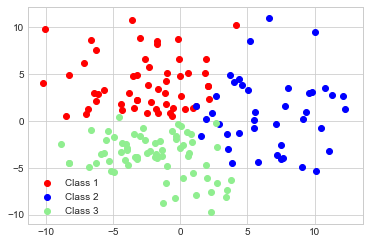

In [33]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [34]:
X = eq_contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

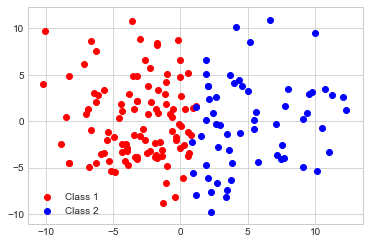

In [35]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### STREET:

In [36]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

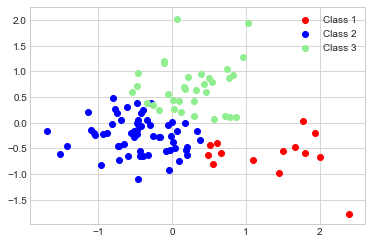

In [37]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [38]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

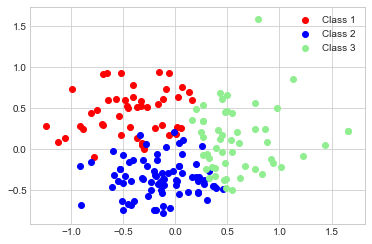

In [39]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

### Inserting variables to PCA:

#### DAU:

In [40]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

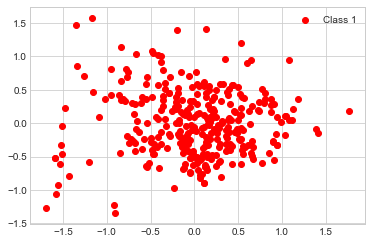

In [41]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [42]:
## genre
gen = np.asarray(user_dau['genere'])
gen_num = np.where(gen=='d',1,0)

In [43]:
np.unique(user_dau['diners_inicials'])

array([20, 30, 40, 50, 60], dtype=int64)

In [44]:
## diners inicials
din_in = np.asarray(user_dau['diners_inicials'])

In [45]:
for i in range(0,user_dau.shape[0]):
    if din_in[i] == 20:
        din_in[i]=0
    elif din_in[i] == 30:
        din_in[i]=1
    elif din_in[i] == 40:
        din_in[i]=2
    elif din_in[i] == 50:
        din_in[i]=3
    else:
        din_in[i]=4

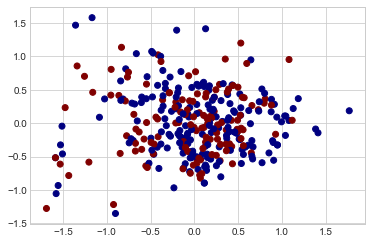

In [46]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

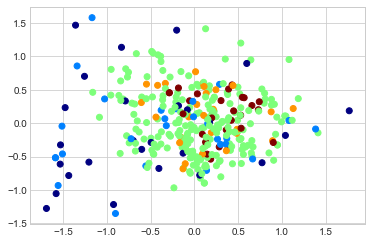

In [47]:
plt.scatter(transformed[0], transformed[1], c=din_in) # According initial budget
plt.jet()

plt.show()

#### Heterogeneous DAU:

In [48]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [68]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

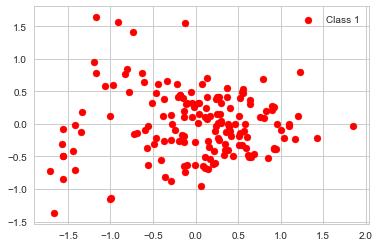

In [69]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### Homogeneous DAU: 

In [70]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [71]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

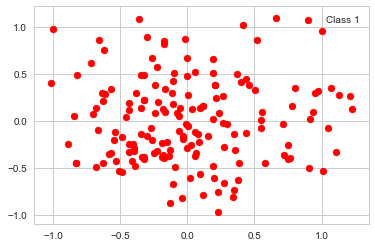

In [72]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### STREET:

In [73]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

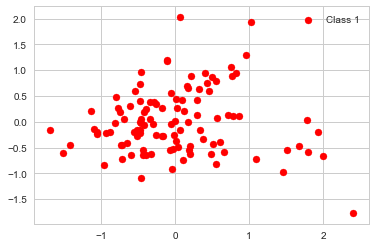

In [74]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [75]:
## genre
#gen = np.asarray(user_street[]['genere'])

gen = np.asarray(user_street.loc[user_street['user_id'].isin(np.unique(userronda_street['user_id']))]['genere'])
gen_num = np.where(gen=='d',1,0)

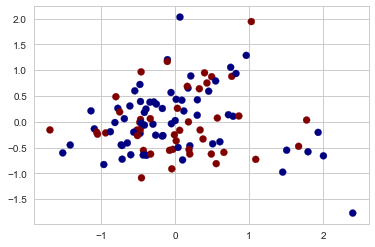

In [76]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

#### VIL:

In [77]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

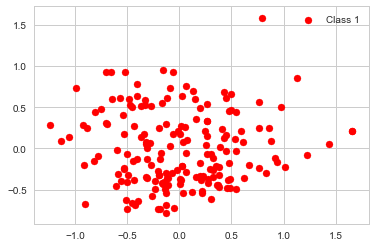

In [78]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [79]:
## genre
#gen = np.asarray(user_vil['genere'])
gen = np.asarray(user_vil.loc[user_vil['user_id'].isin(np.unique(userronda_vil['user_id']))]['genere'])

gen_num = np.where(gen=='F',1,0)

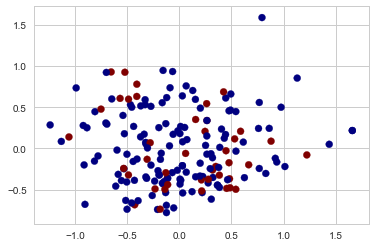

In [80]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

### Space partition

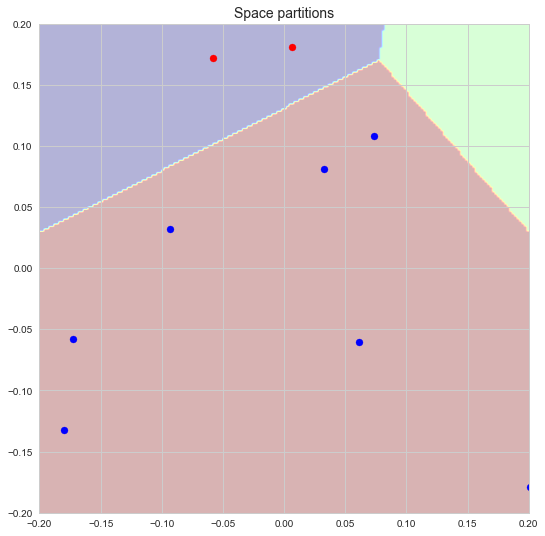

In [81]:
X = np.asarray(transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-0.20,0.20,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-0.2,0.2,-0.2,0.2),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

In [82]:
#from sklearn.datasets import make_regression
#from sklearn.multioutput import MultiOutputRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#X_train, y_train = make_regression(n_samples=10, n_targets=3, random_state=1)
#MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_train)

### Classifiers: 

In [83]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [84]:
def classification(contr_ds,nclust):
    X = contr_ds
    kmeans = KMeans(n_clusters=nclust, random_state=0).fit(X)
    clustcoef = kmeans.labels_
    y = clustcoef
    X = np.asarray(contr_ds)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  
    #Logistic Regression
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    logreg.fit(X_train, y_train)
    print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
         .format(logreg.score(X_train, y_train)))
    print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
         .format(logreg.score(X_test, y_test)))
    ## Confusion matrix
    pred =logreg.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Decision Tree
    tree = DecisionTreeClassifier()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(tree, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    tree.fit(X_train, y_train)
    print('Accuracy of DecisionTree classifier on training set: {:.2f}'
         .format(tree.score(X_train, y_train)))
    print('Accuracy of DecisionTree classifier on test set: {:.2f}'
         .format(tree.score(X_test, y_test)))  
    ## Confusion matrix
    pred =tree.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## KNNeigbors    
    knn = KNeighborsClassifier()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    knn.fit(X_train, y_train)
    print('Accuracy of KNN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))
    ## Confusion matrix
    pred =knn.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Linear Discriminant Analysis     
    lda = LinearDiscriminantAnalysis()
    results = model_selection.cross_val_score(lda, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    lda.fit(X_train, y_train)
    print('Accuracy of LDA classifier on training set: {:.3f}'
         .format(lda.score(X_train, y_train)))
    print('Accuracy of LDA classifier on test set: {:.3f}'
         .format(lda.score(X_test, y_test)))
    ## Confusion matrix
    pred =lda.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Linear Discriminant Analysis  
    gnb = GaussianNB()
    results = model_selection.cross_val_score(gnb, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    gnb.fit(X_train, y_train)
    print('Accuracy of GNB classifier on training set: {:.3f}'
         .format(gnb.score(X_train, y_train)))
    print('Accuracy of GNB classifier on test set: {:.3f}'
         .format(gnb.score(X_test, y_test)))
    ## Confusion matrix
    pred =gnb.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    ## Support Vector Machine   
    svm = SVC()
    results = model_selection.cross_val_score(svm, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
    svm.fit(X_train, y_train)
    print('Accuracy of SVM classifier on training set: {:.3f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.3f}'
         .format(svm.score(X_test, y_test)))
    ## Confusion matrix
    pred = svm.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [52]:
classification(contr_dau_norm,3)

5-fold cross validation average accuracy: 0.695
Accuracy of LogisticRegression classifier on training set: 0.76
Accuracy of LogisticRegression classifier on test set: 0.74
[[ 3  5  9]
 [ 0 20  3]
 [ 0  0 25]]
             precision    recall  f1-score   support

          0       1.00      0.18      0.30        17
          1       0.80      0.87      0.83        23
          2       0.68      1.00      0.81        25

avg / total       0.80      0.74      0.68        65



5-fold cross validation average accuracy: 0.730
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.77
[[11  2  4]
 [ 1 21  1]
 [ 2  5 18]]
             precision    recall  f1-score   support

          0       0.79      0.65      0.71        17
          1       0.75      0.91      0.82        23
          2       0.78      0.72      0.75        25

avg / total       0.77      0.77      0.77        65



5-fold cross validation average accuracy: 0.880
Accura

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
classification(contr_street_norm,3)

5-fold cross validation average accuracy: 0.597
Accuracy of LogisticRegression classifier on training set: 0.58
Accuracy of LogisticRegression classifier on test set: 0.50
[[ 0  2  0]
 [ 0 11  0]
 [ 0  9  0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.50      1.00      0.67        11
          2       0.00      0.00      0.00         9

avg / total       0.25      0.50      0.33        22



5-fold cross validation average accuracy: 0.802
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.73
[[2 0 0]
 [2 7 2]
 [1 1 7]]
             precision    recall  f1-score   support

          0       0.40      1.00      0.57         2
          1       0.88      0.64      0.74        11
          2       0.78      0.78      0.78         9

avg / total       0.79      0.73      0.74        22



5-fold cross validation average accuracy: 0.886
Accuracy of KNN

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
classification(contr_vil_norm,3)

5-fold cross validation average accuracy: 0.458
Accuracy of LogisticRegression classifier on training set: 0.47
Accuracy of LogisticRegression classifier on test set: 0.47
[[ 0 13  0]
 [ 0 14  0]
 [ 0  6  3]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.42      1.00      0.60        14
          2       1.00      0.33      0.50         9

avg / total       0.41      0.47      0.36        36



5-fold cross validation average accuracy: 0.771
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.81
[[11  0  2]
 [ 0 12  2]
 [ 0  3  6]]
             precision    recall  f1-score   support

          0       1.00      0.85      0.92        13
          1       0.80      0.86      0.83        14
          2       0.60      0.67      0.63         9

avg / total       0.82      0.81      0.81        36



5-fold cross validation average accuracy: 0.778
Accura

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
classification(eq_contr_dau,3)

5-fold cross validation average accuracy: 0.458
Accuracy of LogisticRegression classifier on training set: 0.49
Accuracy of LogisticRegression classifier on test set: 0.45
[[ 1  0 10]
 [ 0  0  8]
 [ 0  0 14]]
             precision    recall  f1-score   support

          0       1.00      0.09      0.17        11
          1       0.00      0.00      0.00         8
          2       0.44      1.00      0.61        14

avg / total       0.52      0.45      0.31        33



5-fold cross validation average accuracy: 0.721
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.82
[[ 7  2  2]
 [ 0  7  1]
 [ 0  1 13]]
             precision    recall  f1-score   support

          0       1.00      0.64      0.78        11
          1       0.70      0.88      0.78         8
          2       0.81      0.93      0.87        14

avg / total       0.85      0.82      0.82        33



5-fold cross validation average accuracy: 0.837
Accura

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
classification(ineq_contr_dau,3)

5-fold cross validation average accuracy: 0.550
Accuracy of LogisticRegression classifier on training set: 0.57
Accuracy of LogisticRegression classifier on test set: 0.73
[[20  0  0]
 [ 6  4  0]
 [ 3  0  0]]
             precision    recall  f1-score   support

          0       0.69      1.00      0.82        20
          1       1.00      0.40      0.57        10
          2       0.00      0.00      0.00         3

avg / total       0.72      0.73      0.67        33



5-fold cross validation average accuracy: 0.768
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.70
[[14  6  0]
 [ 2  8  0]
 [ 0  2  1]]
             precision    recall  f1-score   support

          0       0.88      0.70      0.78        20
          1       0.50      0.80      0.62        10
          2       1.00      0.33      0.50         3

avg / total       0.77      0.70      0.70        33



5-fold cross validation average accuracy: 0.822
Accura

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Linear Discriminant Analysis

The best classifier according the Kfold method for this data is the LDA so lets review what we would get. 

#### DAU:

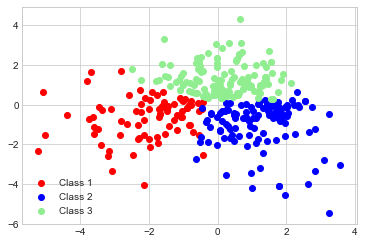

In [85]:
X = contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

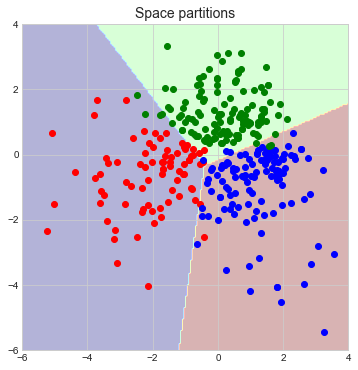

In [86]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-6,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-6,4,-6,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### Heterogeneous DAU:

In [53]:
X = ineq_contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(solver='svd',n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

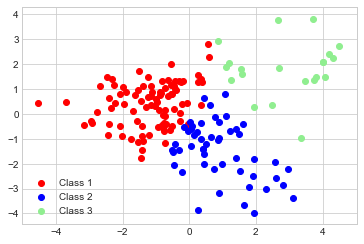

In [54]:
# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

In [ ]:
X = ineq_contr_dau_norm
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### Homogeneous DAU:

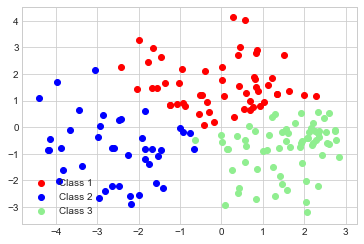

In [57]:
X = eq_contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### STREET:

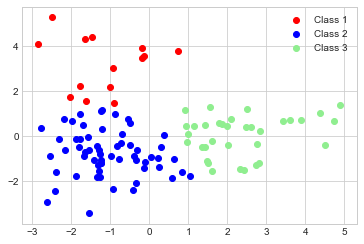

In [58]:
X = contr_street_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=1)
plt.show()

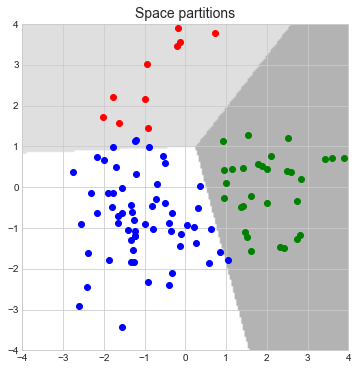

In [59]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### VIL:

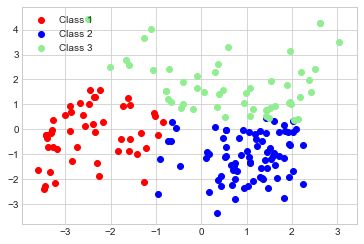

In [60]:
X = contr_vil_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=2)
plt.show()

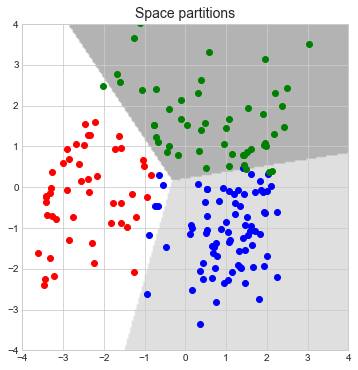

In [61]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

## Identifying groups: 
### DAU

In [62]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [63]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    81.00000
mean      0.07071
std       0.01343
min       0.04500
25%       0.06000
50%       0.06750
75%       0.08000
max       0.10000
dtype: float64

In [64]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    117.000000
mean       0.063115
std        0.014939
min        0.045000
25%        0.052500
50%        0.060000
75%        0.070000
max        0.100000
dtype: float64

In [65]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    126.000000
mean       0.039386
std        0.009750
min        0.000000
25%        0.035000
50%        0.040000
75%        0.046667
max        0.055000
dtype: float64

### 2: Initial budget per cluster

In [66]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

In [67]:
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

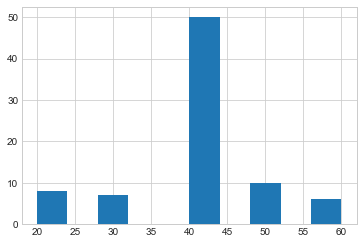

In [68]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

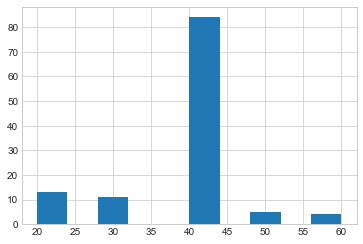

In [69]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

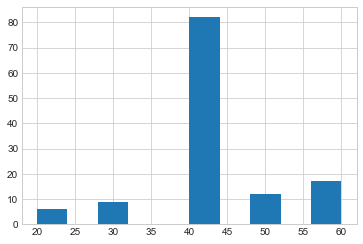

In [70]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [71]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=1.5142044491221778, pvalue=0.13158490448678825)

In [72]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-1.5748250161870148, pvalue=0.1168388277989728)

In [73]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-3.5670975374776734, pvalue=0.00043533801912292634)

### STREET

In [88]:
def gen_stats_clust (contr_table,user_ds,n_clust):
    X = contr_table
    kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(X)
    clustcoef = kmeans.labels_
    y = clustcoef
    clusters=[]
    print(np.unique(y))
    for i in np.unique(y):
        print(i)
        df = X.loc[y == i]
        clusters.append(df)
        print(df.mean(axis=1).describe())
        users_clust = list(df.index)
        din_in_clust = user_ds[user_ds['user_id'].isin(users_clust)]['diners_inicials']
        
        #Plot
        fig = plt.figure(figsize=(6,4))
        ax = fig.add_subplot(111)
        x = np.linspace(1, len(din_in_clust), len(din_in_clust))
        y = din_in_clust
        plt.hist(y)
        plt.show()
    return clusters

In [ ]:
gen_stats_clust (contr_street_norm,user_street,2)

In [74]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [75]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    14.000000
mean      0.082976
std       0.016489
min       0.060000
25%       0.066667
50%       0.085000
75%       0.100000
max       0.100000
dtype: float64

In [76]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    60.000000
mean      0.040533
std       0.012805
min       0.005000
25%       0.034583
50%       0.041667
75%       0.050000
max       0.065000
dtype: float64

In [77]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    34.000000
mean      0.073794
std       0.013974
min       0.051667
25%       0.060000
50%       0.074167
75%       0.080000
max       0.100000
dtype: float64

### 2: Initial budget per cluster

In [78]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']

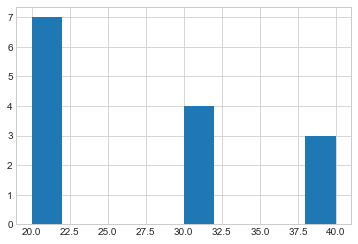

In [79]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

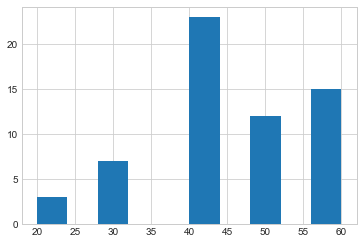

In [80]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

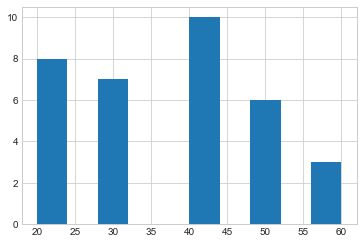

In [81]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [82]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.4586279632790582, pvalue=6.4701837785756842e-07)

In [83]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=3.1569312741422118, pvalue=0.0021561385602864398)

In [84]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-2.6036471852092404, pvalue=0.012376486067399793)

### 2 clusters:

In [85]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]


In [86]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    63.000000
mean      0.041016
std       0.012610
min       0.005000
25%       0.035000
50%       0.043333
75%       0.050000
max       0.060000
dtype: float64

In [87]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    45.000000
mean      0.078193
std       0.014136
min       0.060000
25%       0.066667
50%       0.080000
75%       0.090000
max       0.100000
dtype: float64

In [88]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)

din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']

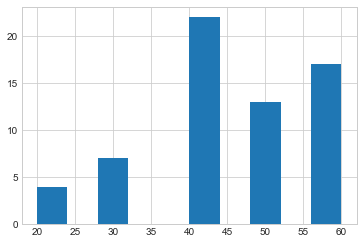

In [89]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

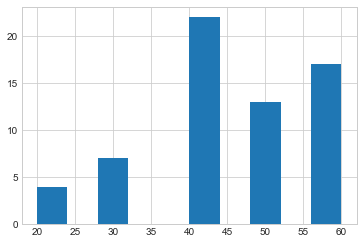

In [90]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [91]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=5.4155599573308741, pvalue=3.8408702886598945e-07)

### VIL:

In [258]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics

In [259]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    48.000000
mean      0.068229
std       0.010793
min       0.050000
25%       0.060000
50%       0.070000
75%       0.075000
max       0.095000
dtype: float64

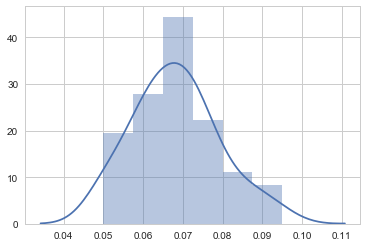

In [260]:
import seaborn as sns
#sns.set(color_codes=True)


ax = sns.distplot(mean_contr_user_clust1)
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

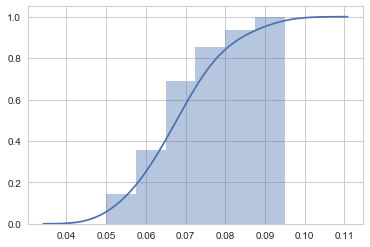

In [261]:
sns.distplot(mean_contr_user_clust1,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

In [262]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    79.000000
mean      0.057595
std       0.009834
min       0.040000
25%       0.050000
50%       0.055000
75%       0.065000
max       0.085000
dtype: float64

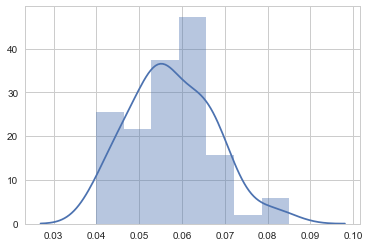

In [263]:
sns.distplot(mean_contr_user_clust2)

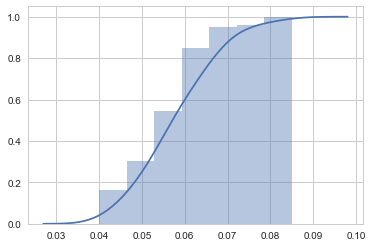

In [264]:
sns.distplot(mean_contr_user_clust2,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [265]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    53.000000
mean      0.036792
std       0.011270
min       0.000000
25%       0.030000
50%       0.040000
75%       0.045000
max       0.050000
dtype: float64

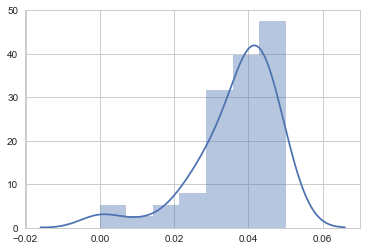

In [266]:
sns.distplot(mean_contr_user_clust3)

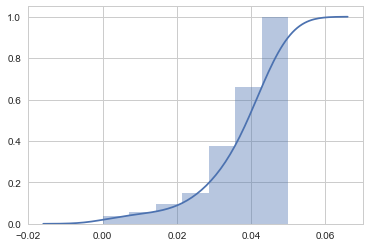

In [267]:
sns.distplot(mean_contr_user_clust3,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

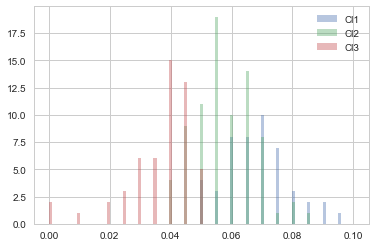

In [268]:
bins = np.linspace(0, 0.1, 100)

plt.hist(mean_contr_user_clust1, bins, alpha=0.4, label='Cl1')
plt.hist(mean_contr_user_clust2, bins, alpha=0.4, label='Cl2')
plt.hist(mean_contr_user_clust3, bins, alpha=0.4, label='Cl3')
plt.legend(loc='upper right')
plt.show()

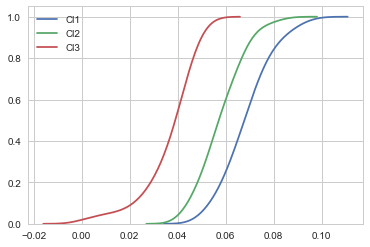

In [269]:
ax = sns.kdeplot(mean_contr_user_clust1,cumulative=True, label='Cl1')
ax = sns.kdeplot(mean_contr_user_clust2,cumulative=True, label='Cl2')
ax = sns.kdeplot(mean_contr_user_clust3,cumulative=True, label='Cl3')      
plt.legend(loc='upper left')
plt.show()

In [119]:
#ind = np.arange(N)    # the x locations for the groups
#width = 0.35       # the width of the bars: can also be len(x) sequence
#
#p1 = plt.bar(ind, menMeans, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)
#
#plt.ylabel('Scores')
#plt.title('Scores by group and gender')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#
#plt.show()

In [120]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=5.6941549185232745, pvalue=8.3839143407128732e-08)

In [121]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=14.283465458342457, pvalue=8.6728515914237832e-26)

In [122]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=11.230720539428621, pvalue=7.097678463901472e-21)

### Heterogeneous DAU: 

In [126]:
#ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
#ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [250]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 2 per les contribucions dels casos amb desigualtat

X = ineq_contr_dau_norm
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
#clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [251]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    53.000000
mean      0.082522
std       0.013669
min       0.060000
25%       0.070000
50%       0.080000
75%       0.100000
max       0.100000
dtype: float64

In [252]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    109.000000
mean       0.045261
std        0.012420
min        0.000000
25%        0.040000
50%        0.046667
75%        0.055000
max        0.065000
dtype: float64

### 2: Initial budget per cluster

In [253]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
#users_clust3 = list(clust3.index)

In [254]:
#user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
#user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
#din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

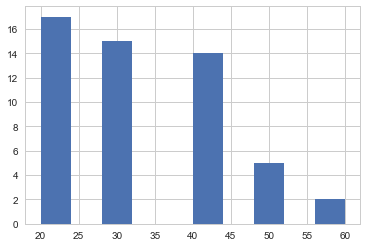

In [255]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

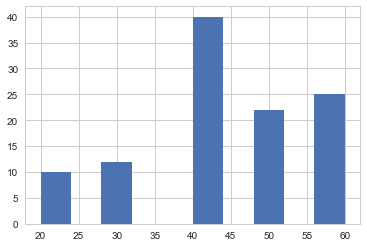

In [256]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [257]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.6468634337114052, pvalue=7.2829487544687928e-08)

### Homogeneous DAU:

In [136]:
#eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
#eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [137]:
#eq_contr_dau.to_csv('dades/eq_contr_dau.csv' ,sep=',', index=False)

In [238]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 4 per les contribucions dels casos amb desigualtat

X = eq_contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]
#clust4 = X.iloc[y == 3]

### 1: General Statistics per cluster

In [239]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    54.000000
mean      0.039907
std       0.008687
min       0.015000
25%       0.035000
50%       0.040000
75%       0.046875
max       0.052500
dtype: float64

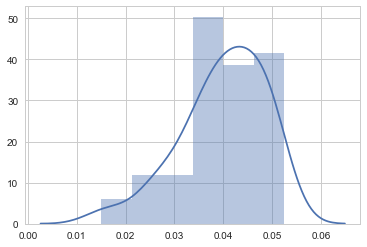

In [240]:
sns.distplot(mean_contr_user_clust1)

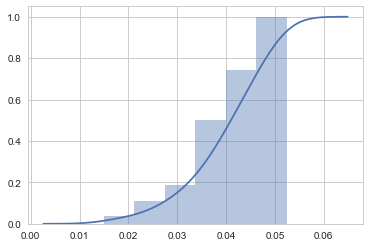

In [241]:
sns.distplot(mean_contr_user_clust1,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [242]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    41.000000
mean      0.067805
std       0.010565
min       0.045000
25%       0.060000
50%       0.067500
75%       0.075000
max       0.085000
dtype: float64

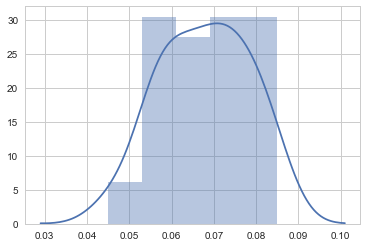

In [243]:
sns.distplot(mean_contr_user_clust2)

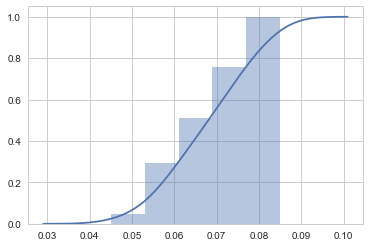

In [244]:
sns.distplot(mean_contr_user_clust2,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [245]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    67.000000
mean      0.057201
std       0.009490
min       0.040000
25%       0.050000
50%       0.055000
75%       0.062500
max       0.080000
dtype: float64

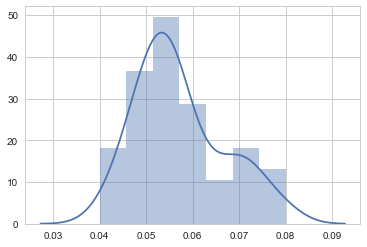

In [246]:
sns.distplot(mean_contr_user_clust3)

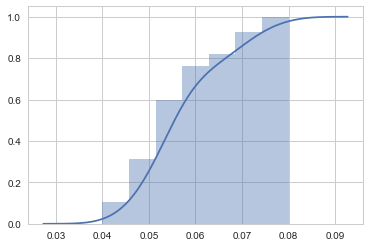

In [247]:
sns.distplot(mean_contr_user_clust3,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

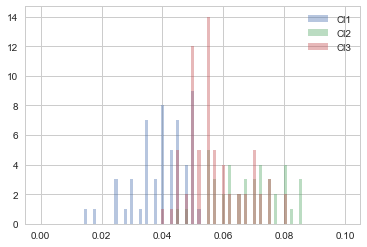

In [248]:
bins = np.linspace(0, 0.1, 100)

plt.hist(mean_contr_user_clust1, bins, alpha=0.4, label='Cl1')
plt.hist(mean_contr_user_clust2, bins, alpha=0.4, label='Cl2')
plt.hist(mean_contr_user_clust3, bins, alpha=0.4, label='Cl3')
plt.legend(loc='upper right')
plt.show()

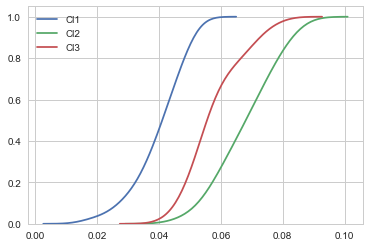

In [249]:
ax = sns.kdeplot(mean_contr_user_clust1,cumulative=True, label='Cl1')
ax = sns.kdeplot(mean_contr_user_clust2,cumulative=True, label='Cl2')
ax = sns.kdeplot(mean_contr_user_clust3,cumulative=True, label='Cl3')      
plt.legend(loc='upper left')
plt.show()

In [162]:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)

Ttest_indResult(statistic=-14.116702702376772, pvalue=7.452457027436837e-25)

In [163]:
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)

Ttest_indResult(statistic=-10.34526380105876, pvalue=2.782778278293882e-18)

In [164]:
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)

Ttest_indResult(statistic=5.3964863284997007, pvalue=4.1748857932431086e-07)

In [155]:
#stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust4)

In [156]:
#stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust4)

In [157]:
#stats.ttest_ind(mean_contr_user_clust3,mean_contr_user_clust4)#Només en la relació entre el cluster 3 i 4 no hi ha mitges diferents

### Other clustering methods: 

### Dendogram - Hierarchical Clustering

In [165]:
# needed imports# neede 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#### DAU:

In [75]:
X = np.asarray(contr_dau_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')

In [145]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.30483957448028776

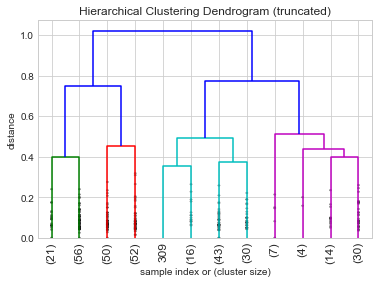

In [146]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### STREET

In [156]:
X = np.asarray(contr_street_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')


In [157]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.46278268935359179

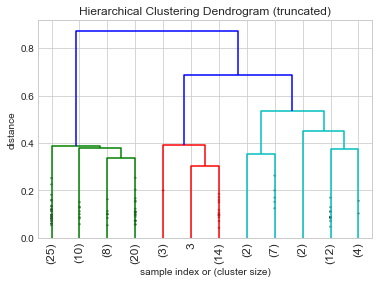

In [158]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [159]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

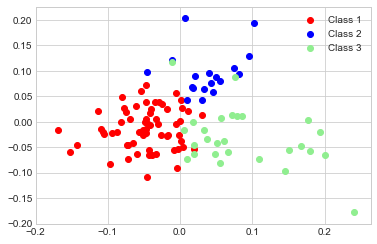

In [160]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [161]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

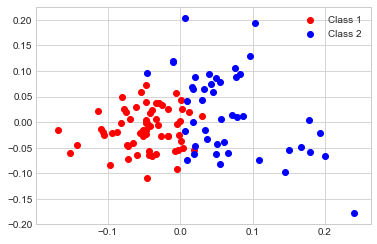

In [162]:
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogènies DAU

In [97]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [98]:
X = np.asarray(ineq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

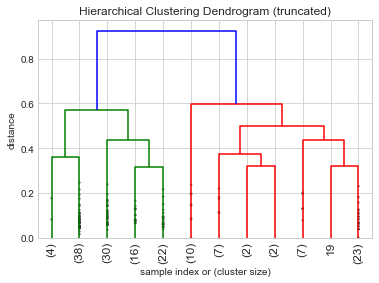

In [99]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [100]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

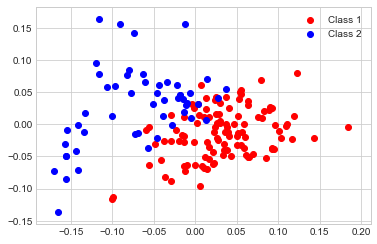

In [101]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [102]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.59
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

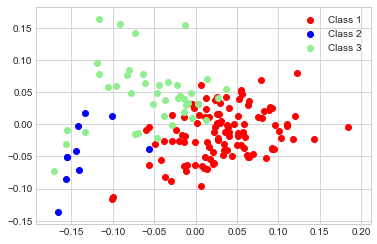

In [104]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogènies DAU:

In [130]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [131]:
X = np.asarray(eq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

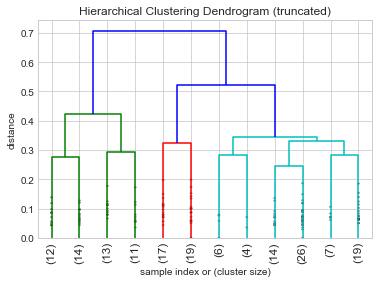

In [132]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [135]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.50 # Selecting 3 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

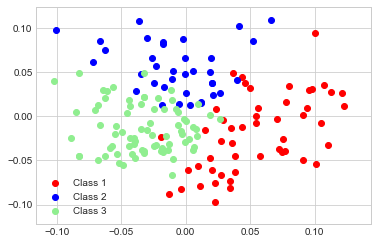

In [136]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [133]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.55 # Selecting 2 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

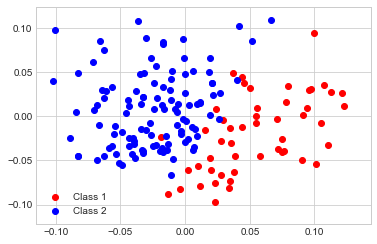

In [134]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [163]:
X = contr_vil_norm
# generate the linkage matrix
Z = linkage(X, 'ward')

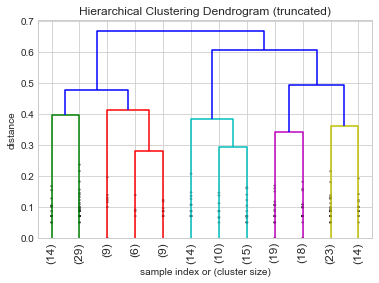

In [164]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [165]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [166]:
# set cut-off to 50
max_d = 0.5  # max_d as in max_distance

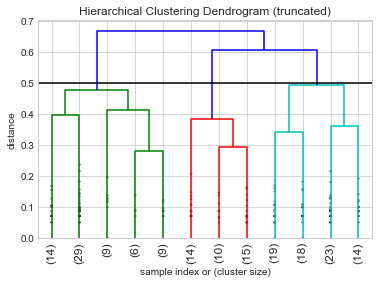

In [167]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

#### Elbow Method
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Retrieve-the-Clusters

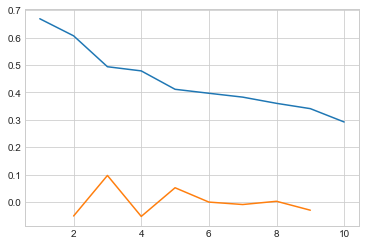

clusters: 3


In [139]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [168]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.5
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

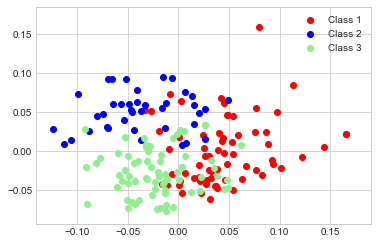

In [169]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

## Evolution of strategies: 

### First Round effect: 

In [116]:
np.mean(contr_street_norm.iloc[:,0], axis = 0)

0.06067901234567897

In [117]:
contr_street_norm.iloc[:,:].describe()

ronda_id,1,2,3,4,5,6,7,8,9,10
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.060679,0.069907,0.063580,0.069475,0.065525,0.059259,0.064784,0.041296,0.036883,0.033673
std,0.044172,0.051107,0.048578,0.052196,0.044015,0.042012,0.046319,0.043459,0.045475,0.046877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033333,0.040000,0.025000,0.033333,0.040000,0.033333,0.040000,0.000000,0.000000,0.000000
50%,0.050000,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.040000,0.000000,0.000000
75%,0.080000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.066667,0.066667,0.066667
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


In [118]:
col1 = contr_street_norm.iloc[:,0:2]
col2 = contr_street_norm.iloc[:,2:4]
col3 = contr_street_norm.iloc[:,4:6]
col4 = contr_street_norm.iloc[:,6:8]
col5 = contr_street_norm.iloc[:,8:10]

In [119]:
np.unique(contr_street.iloc[:,0])

array([0, 2, 4], dtype=int64)

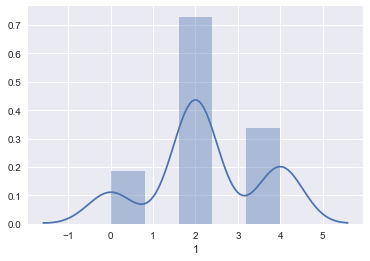

In [183]:
sns.distplot(contr_street.iloc[:,0])

In [120]:
np.unique(contr_street.iloc[:,0:2])

array([0, 2, 4], dtype=int64)

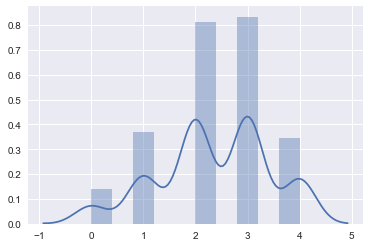

In [178]:
sns.distplot(contr_street.iloc[:,0:2].mean(axis=1))

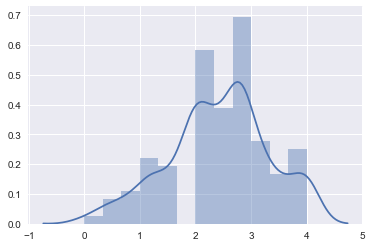

In [179]:
sns.distplot(contr_street.iloc[:,0:5].mean(axis=1))

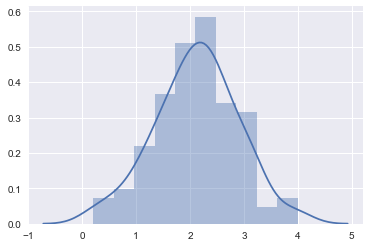

In [180]:
sns.distplot(contr_street.iloc[:,0:10].mean(axis=1))

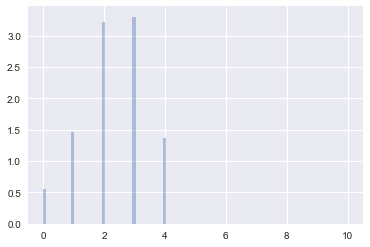

In [185]:
bins = np.linspace(0, 10, 100)

plt.hist(contr_street.iloc[:,0:2].mean(axis=1), bins, alpha=0.4, label='', density = True)
#plt.hist(mean_contr_user_clust2, bins, alpha=0.4, label='Cl2')
#plt.hist(mean_contr_user_clust3, bins, alpha=0.4, label='Cl3')
plt.legend(loc='upper right')
plt.show()

In [186]:
#create new df 
df = pd.DataFrame({'col1':col1.mean(axis=1),'col2':col2.mean(axis=1),'col3':col3.mean(axis=1),
                   'col4':col4.mean(axis=1),'col5':col5.mean(axis=1), })
#print (df)

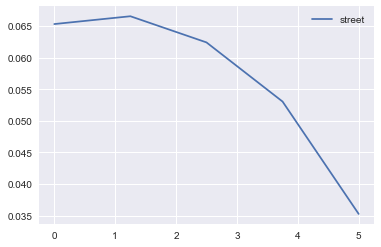

In [188]:
# Mean contribution per round
mean_contr_df = df.mean(axis=0)

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 5, 5)
ax.plot(x, mean_contr_df,label="street")
plt.legend()

### Final Rounds Contribution: 

In [213]:
import seaborn as sns

In [214]:
def final_benef (user_ds):
    din_fin = np.asarray(user_ds['guany_final'])
    sns.distplot(din_fin)
    return(din_fin)
   
def ratio_benef (user_ds):
    din_ini = user_ds['diners_inicials']
    din_fin = user_ds['guany_final']

    sns.distplot(din_fin/din_ini)
    return(din_fin/din_ini)

#### Homogeneous DAU: 

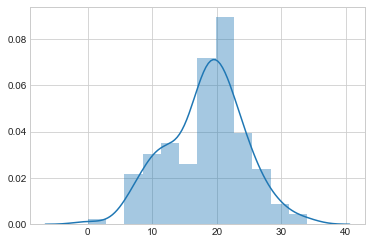

In [215]:
#eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
#user_eq_dau = user_dau[user_dau.index.isin(eq_dau['user_id'])]
din_fin_eq_dau = final_benef(eq_user_dau)

#### Heterogeneous DAU: 

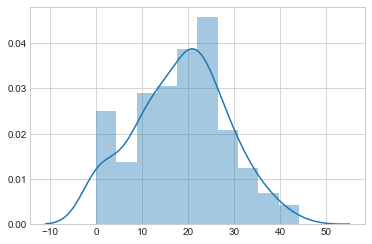

In [218]:
#ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
#user_ineq_dau = user_dau[user_dau.index.isin(ineq_dau['user_id'])]
din_fin_ineq_dau = final_benef(ineq_user_dau)

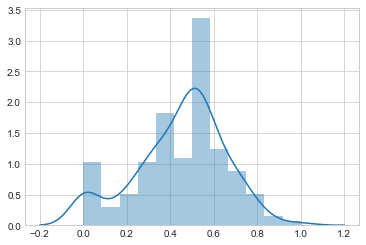

In [219]:
#user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
#user_dau.drop(user_dau.index[3], inplace=True)
#ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
#user_ineq_dau = user_dau[user_dau.index.isin(ineq_dau['user_id'])]
ratio_ben_ineq_dau = ratio_benef(ineq_user_dau)

In [188]:
from scipy import stats
stats.ttest_ind(din_fin_eq_dau,din_fin_ineq_dau)

Ttest_indResult(statistic=-0.71435462854231069, pvalue=0.47552867758678397)

#### STREET

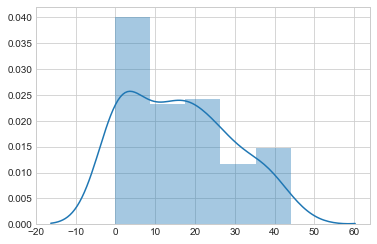

In [220]:
din_fin_street = final_benef(user_street)

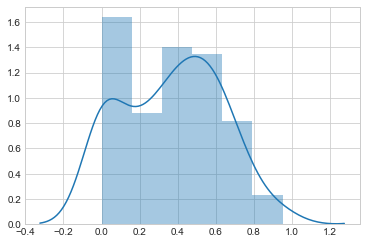

In [221]:
ratio_ben_street = ratio_benef(user_street)

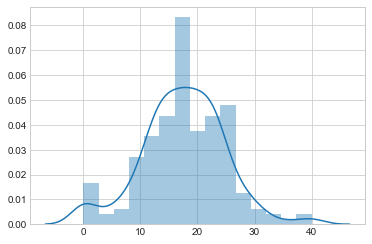

In [222]:
din_fin_vil = final_benef(user_vil)

In [223]:
# Mirar diferència entre homogènies: 
from scipy import stats
stats.ttest_ind(din_fin_eq_dau,din_fin_vil)
# pvalue>0.01 per tant no hi ha diferència de mitges.

Ttest_indResult(statistic=1.0367190793034766, pvalue=0.30060355033984526)

#### Following Milinski 2006, and Milinski 2007; look for the number of times that people put 0, 2 or 4:  

In [163]:
import sys
def acum_contr_dau(contr_ds):
    fair = []
    for i in range(0,contr_ds.shape[1]):
        contr_street.iloc[:,i].value_counts()
        for j in [0,1,2,3,4]:
            fair.append(contr_ds.iloc[:,i].value_counts()[j])
    acum_contr = np.reshape(fair, (10, 5))
    return(acum_contr)

In [166]:
acum_contr_eq = acum_contr_dau(eq_contr_dau)
acum_contr_ineq = acum_contr_dau(ineq_contr_dau)

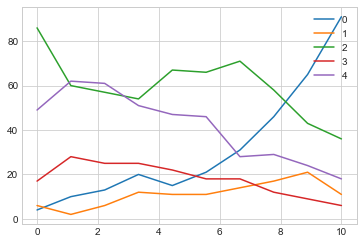

In [165]:
# Homogeneous DAU
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, acum_contr_eq.T[0],label="0")
ax.plot(x, acum_contr_eq.T[1],label="1")
ax.plot(x, acum_contr_eq.T[2],label="2")
ax.plot(x, acum_contr_eq.T[3],label="3")
ax.plot(x, acum_contr_eq.T[4],label="4")
plt.legend()

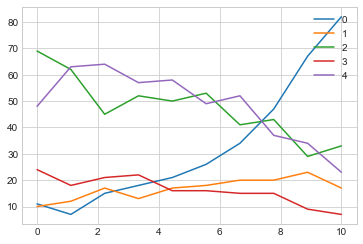

In [167]:
# Heterogeneous DAU
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, acum_contr_ineq.T[0],label="0")
ax.plot(x, acum_contr_ineq.T[1],label="1")
ax.plot(x, acum_contr_ineq.T[2],label="2")
ax.plot(x, acum_contr_ineq.T[3],label="3")
ax.plot(x, acum_contr_ineq.T[4],label="4")
plt.legend()

In [1]:
import sys
def acum_contr(contr_ds):
    fair = []
    for i in range(0,contr_ds.shape[1]):
        contr_ds.iloc[:,i].value_counts()
        for j in [0,2,4]:
            fair.append(contr_ds.iloc[:,i].value_counts()[j])
    acum_contr = np.reshape(fair, (10, 3))
    return(acum_contr)

In [2]:
acum_contr_street = acum_contr(contr_street)
acum_contr_vil = acum_contr(contr_vil)

NameError: name 'contr_street' is not defined

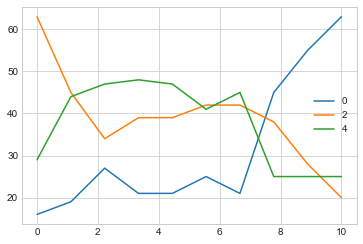

In [158]:
# STREET

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, acum_contr_street.T[0],label="0")
ax.plot(x, acum_contr_street.T[1],label="2")
ax.plot(x, acum_contr_street.T[2],label="4")
plt.legend()

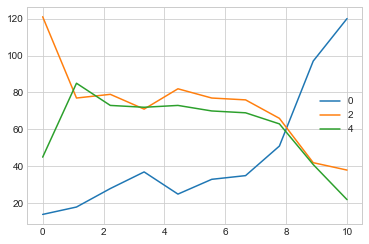

In [160]:
# VIL

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, acum_contr_vil.T[0],label="0")
ax.plot(x, acum_contr_vil.T[1],label="2")
ax.plot(x, acum_contr_vil.T[2],label="4")
plt.legend()

In [ ]:


plt.hist(bins,acum_contr[0],  alpha=0.4, label='Cl1')
plt.legend(loc='upper right')
plt.show()

## Analysis at game level: 

In [85]:
ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")
ronda_street_data = pd.read_csv("dades/ronda_street_partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil_data = pd.read_csv("dades/ronda_vil_partida.csv", delimiter=',' , encoding="latin-1")

In [92]:
sigma_dau.head()

partida_id
1    5.546771
2    4.522782
3    5.292552
4    3.502380
5    4.077036
dtype: float64

In [86]:
partides_info_dau = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_street = ronda_street_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_vil = ronda_vil_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

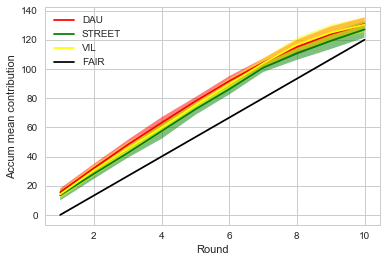

In [95]:
mean_cumsum_dau = partides_info_dau.cumsum(axis=1).mean(axis=0)
mean_cumsum_street = partides_info_street.cumsum(axis=1).mean(axis=0)
mean_cumsum_vil = partides_info_vil.cumsum(axis=1).mean(axis=0)

sigma_dau = partides_info_dau.std(axis=0)
sigma_street = partides_info_street.std(axis=0)
sigma_vil = partides_info_vil.std(axis=0)

fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_cumsum_dau,label="DAU",c = 'red')
ax.plot(x, mean_cumsum_street,label="STREET", c='green')
ax.plot(x, mean_cumsum_vil,label="VIL", c='yellow')
ax.fill_between(x, mean_cumsum_dau+sigma_dau, mean_cumsum_dau-sigma_dau, facecolor='red', alpha=0.5)
ax.fill_between(x, mean_cumsum_street+sigma_street, mean_cumsum_street-sigma_street, facecolor='green', alpha=0.5)
ax.fill_between(x, mean_cumsum_vil+sigma_vil, mean_cumsum_vil-sigma_vil, facecolor='yellow', alpha=0.5)
y = np.linspace(0, 120, 10)
ax.plot(x, y,label="FAIR", c="black")
plt.xlabel('Round')
plt.ylabel('Accum mean contribution')
plt.legend()

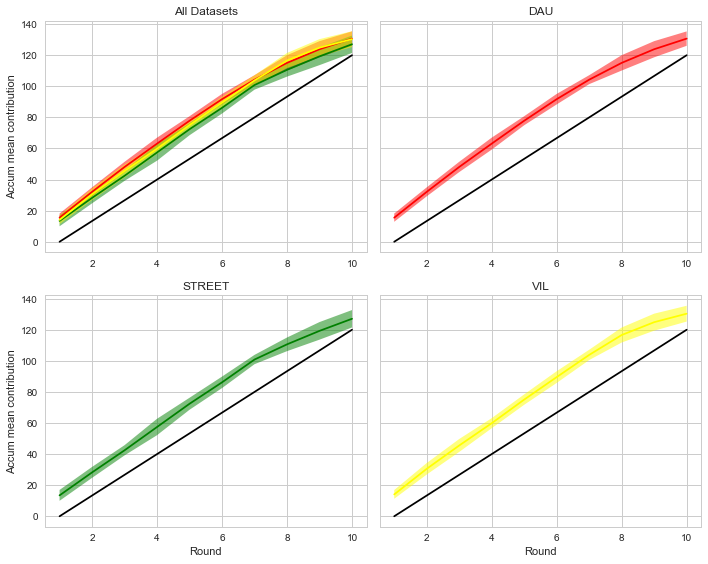

In [101]:
x = np.linspace(1, 10, 10)
y = np.linspace(0, 120, 10)
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].plot(x, mean_cumsum_dau,label="DAU",c = 'red')
axs[0,0].plot(x, mean_cumsum_street,label="STREET", c='green')
axs[0,0].plot(x, mean_cumsum_vil,label="VIL", c='yellow')
axs[0,0].fill_between(x, mean_cumsum_dau+sigma_dau, mean_cumsum_dau-sigma_dau, facecolor='red', alpha=0.5)
axs[0,0].fill_between(x, mean_cumsum_street+sigma_street, mean_cumsum_street-sigma_street, facecolor='green', alpha=0.5)
axs[0,0].fill_between(x, mean_cumsum_vil+sigma_vil, mean_cumsum_vil-sigma_vil, facecolor='yellow', alpha=0.5)
axs[0,0].plot(x, y,label="FAIR", c="black")
axs[0,0].set_ylabel('Accum mean contribution')
axs[0,0].set_title('All Datasets')

axs[0,1].plot(x, mean_cumsum_dau,label="DAU",c = 'red')
axs[0,1].fill_between(x, mean_cumsum_dau+sigma_dau, mean_cumsum_dau-sigma_dau, facecolor='red', alpha=0.5)
axs[0,1].plot(x, y,label="FAIR", c="black")
axs[0,1].set_title('DAU')

axs[1,0].plot(x, mean_cumsum_street,label="STREET", c='green')
#axs[1,0].set_xticks(bins[:-1])
axs[1,0].fill_between(x, mean_cumsum_street+sigma_street, mean_cumsum_street-sigma_street, facecolor='green', alpha=0.5)
axs[1,0].set_xlabel('Round')
axs[1,0].set_ylabel('Accum mean contribution')
axs[1,0].plot(x, y,label="FAIR", c="black")
axs[1,0].set_title('STREET')

axs[1,1].plot(x, mean_cumsum_vil,label="VIL", c='yellow')
axs[1,1].fill_between(x, mean_cumsum_vil+sigma_vil, mean_cumsum_vil-sigma_vil, facecolor='yellow', alpha=0.5)
#axs[1,1].set_xticks(bins[:-1])
axs[1,1].set_xlabel('Round')
#axs[1,1].set_ylabel('Count')
axs[1,1].plot(x, y,label="FAIR", c="black")
axs[1,1].set_title('VIL')
 
fig.tight_layout()    
    
   
plt.show()

In [78]:
for j in range(1,partides_info.shape[1]+1):
    for i in range(1,partides_info.shape[0]+1):
        if partides_info.loc[i,j] == 12:
            partides_info.loc[i, j] = "2-M"
        elif partides_info.loc[i,j] > 12:
            partides_info.loc[i, j] = "3-H"
        else: 
            partides_info.loc[i, j] = "1-L"

In [1]:
#for i in range(0,partides_info.shape[0]):
#    print(list(partides_info.iloc[i]))

In [80]:
from sklearn import metrics
metrics.mutual_info_score(partides_info.iloc[0], partides_info.iloc[6], contingency=None)

0.20189814062312159

In [81]:
A = np.zeros((partides_info.shape[0],partides_info.shape[0]))
for i in range(0,partides_info.shape[0]):
    for j in range(0,partides_info.shape[0]):
        A[i,j]=metrics.mutual_info_score(partides_info.iloc[i], partides_info.iloc[j], contingency=None)


In [ ]:
print(A)

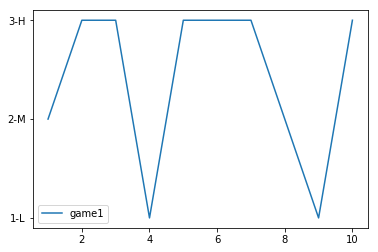

In [82]:
my_yticks = ["L","M","H"]
fig, ax = plt.subplots()
ax.plot(partides_info.columns, list(partides_info.iloc[52]), label="game1")
#ax.plot(partides_info.columns, list(partides_info.iloc[2]), label="game2")
#plt.xticks(list(partides_info.iloc[1]), my_yticks)
ax.legend()
plt.show()